✅ Data loaded successfully!


C:\Users\kash7\AppData\Local\Temp\ipykernel_5008\3225767985.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['success'] = df['success'].fillna(False)  # Replace None with False


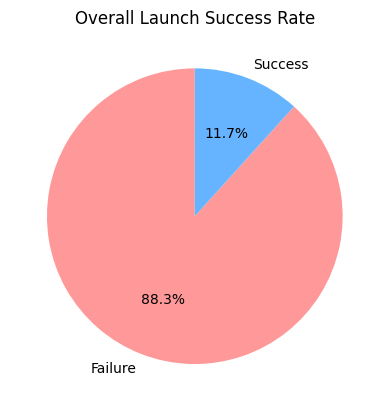

C:\Users\kash7\AppData\Local\Temp\ipykernel_5008\3225767985.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='Set2')


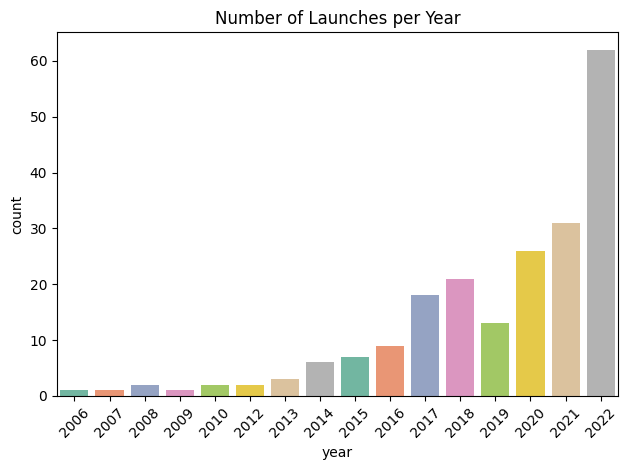

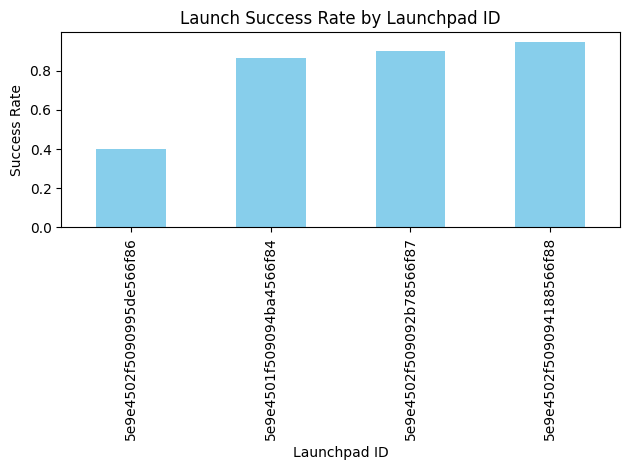

Note: 'payload_mass' not directly available from /launches API.
Note: Orbit data is also inside 'payloads', needs further API call.
⚠️ Latitude and Longitude not found in launch data.


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import requests

# Step 1: Fetch Data from SpaceX API
url = "https://api.spacexdata.com/v4/launches"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df = pd.json_normalize(data)
    print("✅ Data loaded successfully!")
else:
    print("❌ Failed to load data")
    exit()

# Step 2: Clean and Prepare Data
df['date_utc'] = pd.to_datetime(df['date_utc'], errors='coerce')
df['year'] = df['date_utc'].dt.year
df['success'] = df['success'].fillna(False)  # Replace None with False
df['outcome_flag'] = df['success'].astype(int)

# -------------------------------------
# 1. Pie Chart: Launch Success Rate
df['outcome_flag'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Failure', 'Success'],
    colors=['#ff9999', '#66b3ff'],
    startangle=90
)
plt.title("Overall Launch Success Rate")
plt.ylabel("")
plt.show()

# -------------------------------------
# 2. Bar Chart: Launches per Year
sns.countplot(x='year', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title("Number of Launches per Year")
plt.tight_layout()
plt.show()

# -------------------------------------
# 3. Launchpad Success Rate (Optional)
if 'launchpad' in df.columns:
    site_success = df.groupby('launchpad')['outcome_flag'].mean().sort_values()
    site_success.plot(kind='bar', color='skyblue')
    plt.title("Launch Success Rate by Launchpad ID")
    plt.ylabel("Success Rate")
    plt.xlabel("Launchpad ID")
    plt.tight_layout()
    plt.show()

# -------------------------------------
# 4. Payload Scatter Plot (if available)
# This field is nested; not present directly as 'payload_mass'
if 'payloads' in df.columns:
    print("Note: 'payload_mass' not directly available from /launches API.")

# -------------------------------------
# 5. Orbit Success (not available directly either)
if 'payloads' in df.columns:
    print("Note: Orbit data is also inside 'payloads', needs further API call.")

# -------------------------------------
# 6. Folium Map (not possible without lat/lon)
if {'latitude', 'longitude'}.issubset(df.columns):
    m = folium.Map(location=[28.5, -80.6], zoom_start=3)
    for i, row in df.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=row['name']
        ).add_to(m)
    m.save("spacex_launch_map.html")
    print("🌍 Map saved as spacex_launch_map.html")
else:
    print("⚠️ Latitude and Longitude not found in launch data.")
